## 1. Tổng quan bài toán

#### 1.1 Load Libs

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

#### 1.2 Load data

In [113]:
df_advance = pd.read_csv('weatherAUS_advance.csv')
df_advance['RainTomorrow'] = df_advance['RainTomorrow'].fillna('Unknown')

## 2. Khai phá giữ liệu

#### 2.1 Tổng quan dữ liệu

In [114]:
df_advance.shape

(145460, 23)

In [115]:
df_advance.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [116]:
df_advance.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [117]:
df_advance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#### 2.2 Phân tích đơn biến

In [118]:
df_advance['RainTomorrow'].value_counts()/len(df_advance)

No         0.758394
Yes        0.219146
Unknown    0.022460
Name: RainTomorrow, dtype: float64

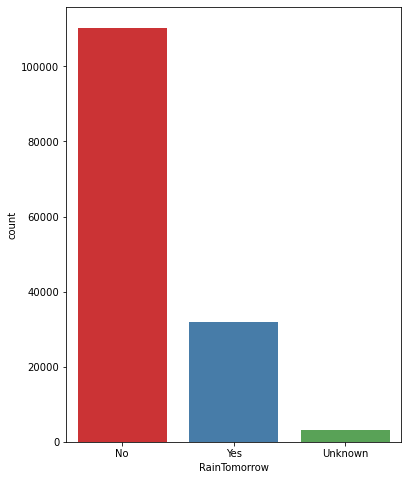

In [119]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x='RainTomorrow', data=df_advance, palette="Set1")
plt.show()

#### 2.3 Phân tích song biến

Với các biến hạng mục:

In [120]:
cate_cols = df_advance.select_dtypes(include=['object']).columns.to_list()
cate_cols

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [121]:
df_advance[cate_cols].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [122]:
df_advance.describe(include='object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,145460
unique,3436,49,16,16,16,2,3
top,2017-03-13,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [123]:
df_advance[cate_cols].isnull().sum()/len(df_advance)

Date            0.000000
Location        0.000000
WindGustDir     0.070989
WindDir9am      0.072639
WindDir3pm      0.029066
RainToday       0.022419
RainTomorrow    0.000000
dtype: float64

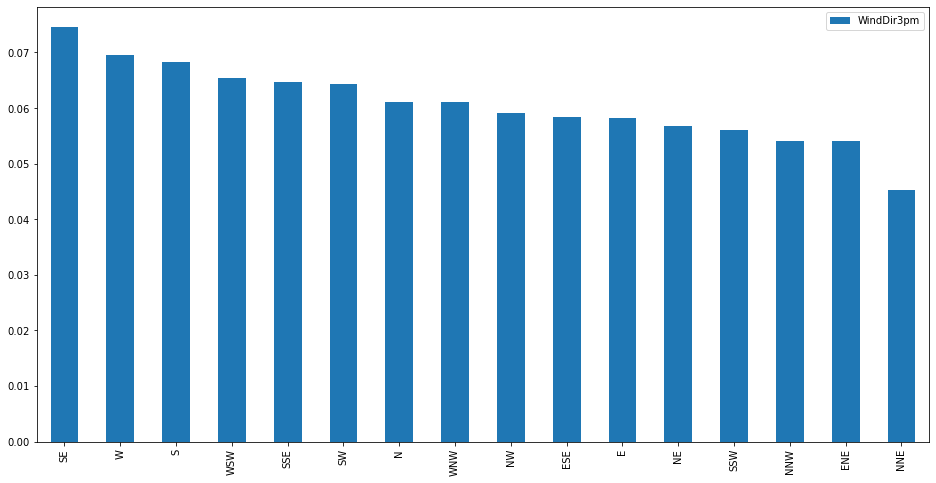

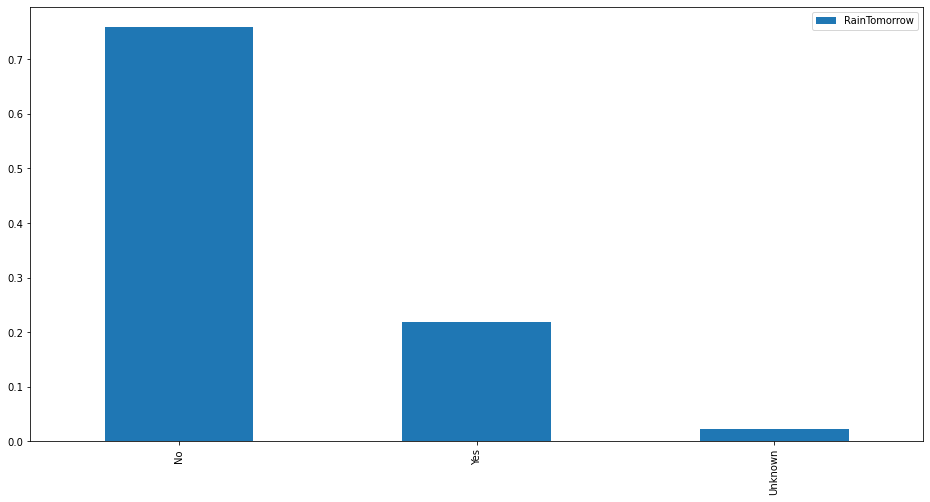

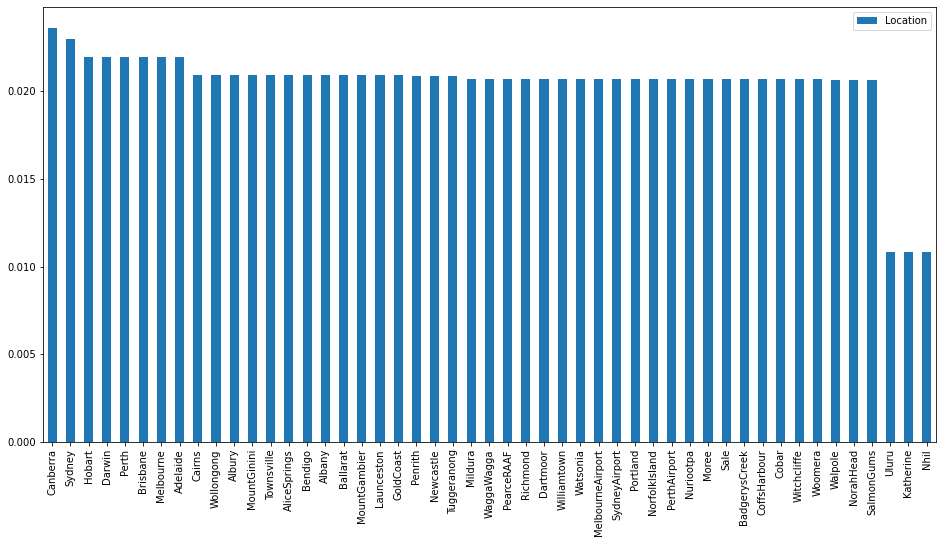

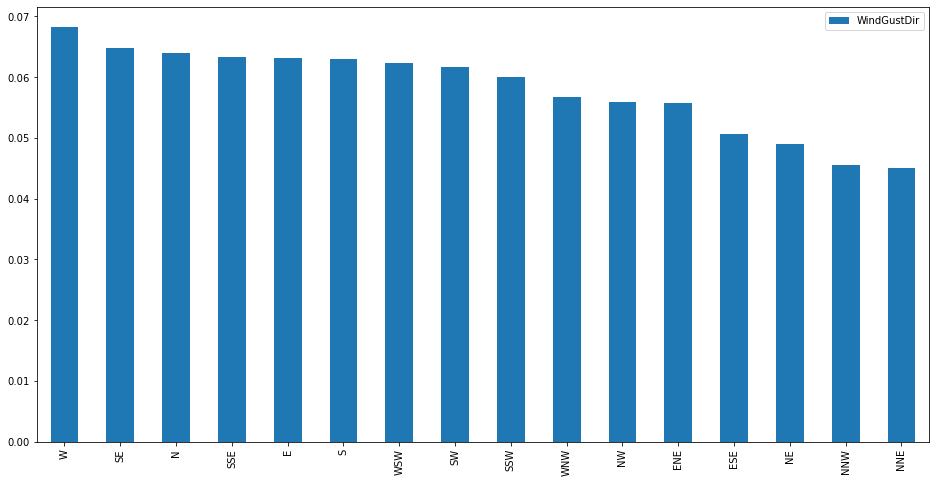

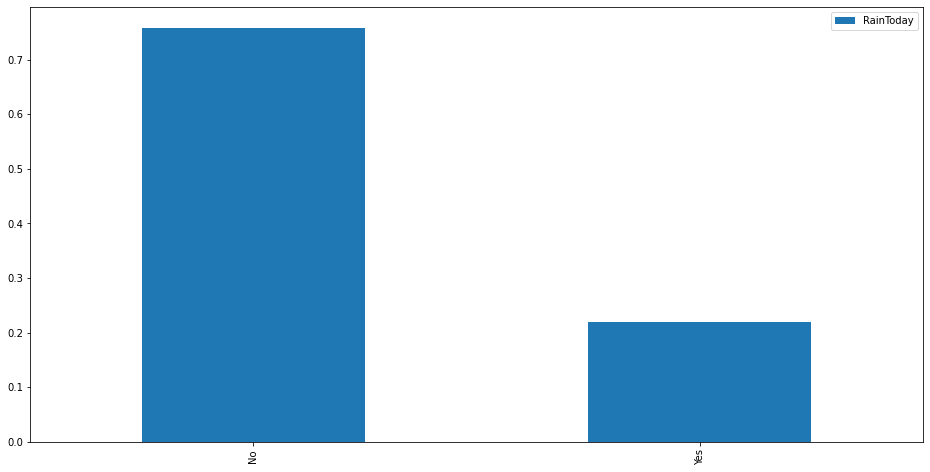

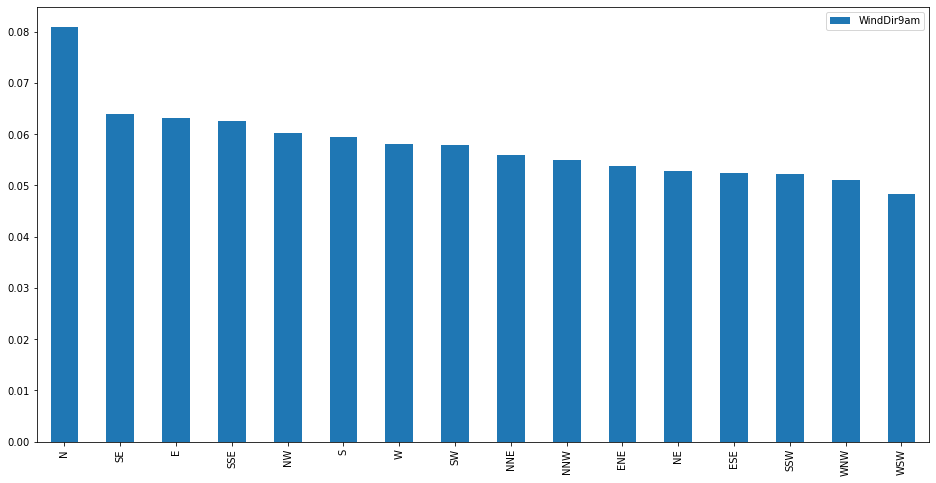

In [124]:
for var in set(cate_cols) - {'Date'}: 
    f, ax = plt.subplots(figsize=(16, 8))
    data_plot = df_advance[var].value_counts()/np.float(len(df_advance[var]))
    ax = data_plot.plot(kind='bar')
    ax.legend()
    plt.show()

Với các biến số:

In [125]:
num_cols = df_advance.select_dtypes(include=['int64', 'float64']).columns.to_list()
num_cols

df_advance[num_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Các outlier của các biến số

In [126]:
for var in num_cols:
    IQR = df_advance[var].quantile(0.75) - df_advance[var].quantile(0.25)
    Lower_fence = df_advance[var].quantile(0.25) - (IQR * 3)
    Upper_fence = df_advance[var].quantile(0.75) + (IQR * 3)
    print('Dữ liệu ngoại lai của biến', var, 'là các giá trị < {lowerboundary} hoặc > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Dữ liệu ngoại lai của biến MinTemp là các giá trị < -20.299999999999997 hoặc > 44.8
Dữ liệu ngoại lai của biến MaxTemp là các giá trị < -13.000000000000004 hoặc > 59.1
Dữ liệu ngoại lai của biến Rainfall là các giá trị < -2.4000000000000004 hoặc > 3.2
Dữ liệu ngoại lai của biến Evaporation là các giá trị < -11.800000000000002 hoặc > 21.800000000000004
Dữ liệu ngoại lai của biến Sunshine là các giá trị < -12.599999999999998 hoặc > 28.0
Dữ liệu ngoại lai của biến WindGustSpeed là các giá trị < -20.0 hoặc > 99.0
Dữ liệu ngoại lai của biến WindSpeed9am là các giá trị < -29.0 hoặc > 55.0
Dữ liệu ngoại lai của biến WindSpeed3pm là các giá trị < -20.0 hoặc > 57.0
Dữ liệu ngoại lai của biến Humidity9am là các giá trị < -21.0 hoặc > 161.0
Dữ liệu ngoại lai của biến Humidity3pm là các giá trị < -50.0 hoặc > 153.0
Dữ liệu ngoại lai của biến Pressure9am là các giá trị < 984.4 hoặc > 1050.9
Dữ liệu ngoại lai của biến Pressure3pm là các giá trị < 981.5999999999999 hoặc > 1048.8000000000002
Dữ liệu n

### 2.4 Phân tích đa biến

Biểu đồ nhiệt của ma trận tương quan

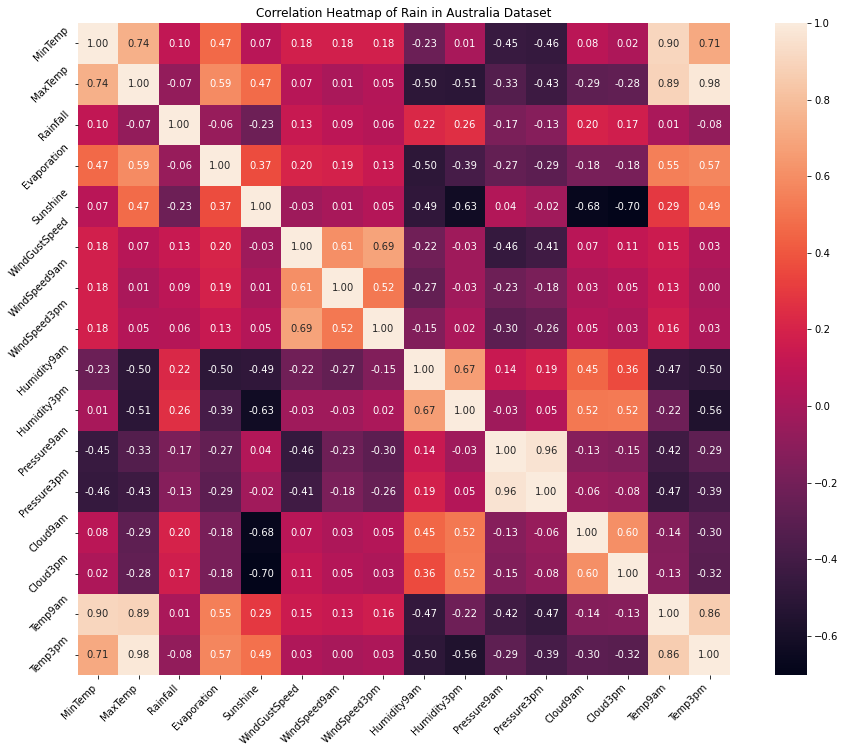

In [127]:
correlation = df_advance.corr()

plt.figure(figsize=(16, 12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')

ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Những features có độ tương quan cao

In [128]:
top_corr_features = correlation.abs().unstack().sort_values(ascending= False).where(lambda x: (x > 0.7) & (x <1)).dropna()
top_corr_features

MaxTemp      Temp3pm        0.984503
Temp3pm      MaxTemp        0.984503
Pressure9am  Pressure3pm    0.961326
Pressure3pm  Pressure9am    0.961326
MinTemp      Temp9am        0.901821
Temp9am      MinTemp        0.901821
MaxTemp      Temp9am        0.887210
Temp9am      MaxTemp        0.887210
Temp3pm      Temp9am        0.860591
Temp9am      Temp3pm        0.860591
MaxTemp      MinTemp        0.736555
MinTemp      MaxTemp        0.736555
             Temp3pm        0.708906
Temp3pm      MinTemp        0.708906
Cloud3pm     Sunshine       0.703930
Sunshine     Cloud3pm       0.703930
dtype: float64

In [129]:
top_corr_col = top_corr_features.unstack().index.to_list()
top_corr_col

['MaxTemp',
 'Temp3pm',
 'Pressure9am',
 'Pressure3pm',
 'MinTemp',
 'Temp9am',
 'Cloud3pm',
 'Sunshine']

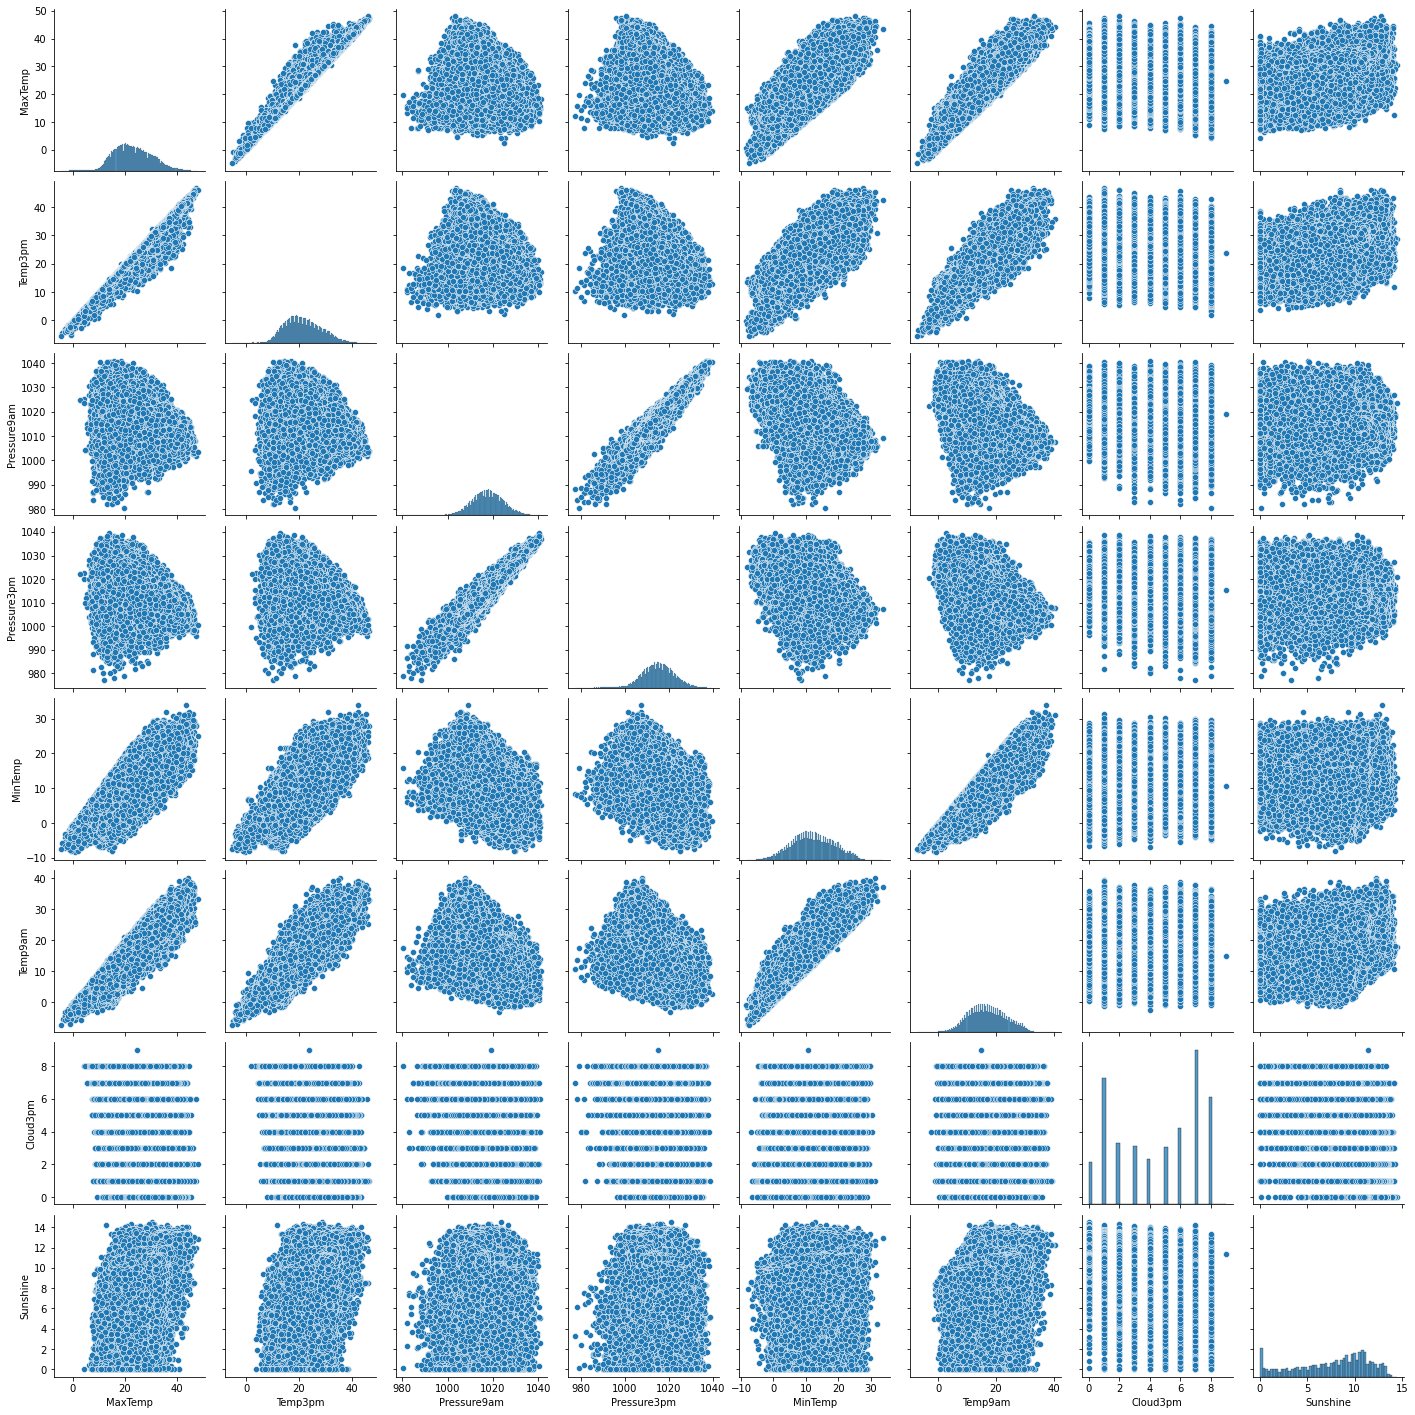

In [130]:
sns.pairplot(df_advance[top_corr_col], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

## 3. Tiền xử lý dữ liệu

#### 3.1 Chuẩn bị dữ liệu

In [131]:
X = df_advance.drop(['RainTomorrow'], axis=1)
y = df_advance['RainTomorrow']

In [132]:
X.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


#### 3.2 Xử lý Date

In [133]:
X['Date'] = pd.to_datetime(X['Date'])
X['day'] = X['Date'].dt.day
X['month'] = X['Date'].dt.month
X['year'] = X['Date'].dt.year

X.drop(['Date'], axis=1, inplace=True)
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,day,month,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,5,12,2008


#### 3.3 Tách dữ liệu

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((116368, 24), (29092, 24))

#### 3.4 Xử lý dữ liệu bị khuyết

In [135]:
(X_train.isnull().sum()/X_train.shape[0]).sort_values(ascending=False)

Sunshine         0.480364
Evaporation      0.432722
Cloud3pm         0.408678
Cloud9am         0.384951
Pressure9am      0.103903
Pressure3pm      0.103671
WindDir9am       0.072597
WindGustDir      0.071068
WindGustSpeed    0.070621
Humidity3pm      0.030919
WindDir3pm       0.028951
Temp3pm          0.024620
RainToday        0.022489
Rainfall         0.022489
WindSpeed3pm     0.021105
Humidity9am      0.018450
Temp9am          0.012160
WindSpeed9am     0.012108
MinTemp          0.010166
MaxTemp          0.008757
month            0.000000
Location         0.000000
day              0.000000
year             0.000000
dtype: float64

Với biến số: Fill NA = median

In [136]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.to_list()
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'day',
 'month',
 'year']

In [137]:
from feature_engine.imputation import MeanMedianImputer

imputer = MeanMedianImputer(imputation_method='median')
imputer.fit(X_train[num_cols])
X_train[num_cols] = imputer.transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])


Với biến Categories: Fill NA bằng Mode

In [138]:
cate_cols = X_train.select_dtypes(include=['object']).columns.to_list()
cate_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [139]:
from feature_engine.imputation import CategoricalImputer

imputer = CategoricalImputer(imputation_method='frequent')
imputer.fit(X_train[cate_cols])
X_train[cate_cols] = imputer.transform(X_train[cate_cols])
X_test[cate_cols] = imputer.transform(X_test[cate_cols])

In [140]:
assert X_train.isnull().sum().sum() == 0
assert X_test.isnull().sum().sum() == 0

#### 3.5 Xử lý outlier cho biến số

In [141]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [142]:
for var in ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']:
    print(var, X_train[var].max(), X_test[var].max())

Rainfall 3.2 3.2
Evaporation 21.8 21.8
WindSpeed9am 55.0 55.0
WindSpeed3pm 57.0 57.0


#### 3.6 Mã hoá biến hạng mục

`LabelEncoder` cho target

In [143]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

`BinaryEncoder` cho RainToday

In [144]:
from category_encoders import BinaryEncoder

encoder = BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,day,month,year
22926,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,ESE,...,1013.9,5.0,7.0,21.4,22.2,0,1,12,3,2014
80735,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,NNE,...,1014.6,3.0,5.0,14.3,23.2,0,1,6,10,2016
121764,Perth,10.9,22.2,1.4,1.2,9.6,SW,26.0,N,SW,...,1014.9,1.0,2.0,16.6,21.5,1,0,31,8,2011
139821,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,E,...,1012.1,1.0,1.0,23.2,29.1,0,1,11,6,2010
1867,Albury,15.7,17.6,3.2,4.7,8.4,E,20.0,ESE,E,...,1010.5,8.0,8.0,16.5,17.3,1,0,10,4,2014


In [145]:
cate_cols = X_train.select_dtypes(include=['object']).columns.to_list()
cate_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

`One-hot` các categories còn lại

In [146]:
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(
    top_categories=None,
    variables=cate_cols,
    drop_last=False)
ohe_enc.fit(X_train)
X_train_encode = ohe_enc.transform(X_train)
X_test_endcode = ohe_enc.transform(X_test)

In [147]:
X_train_encode.shape, X_test_endcode.shape

((116368, 118), (29092, 118))

#### 3.7 Rời rạc biến số

In [148]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

disc = EqualFrequencyDiscretiser(q=10, variables=num_cols)
disc.fit(X_train_encode[num_cols])
X_train_encode[num_cols] = disc.transform(X_train_encode[num_cols])
X_test_endcode[num_cols] = disc.transform(X_test_endcode[num_cols])

In [149]:
X_train_encode.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_WNW,WindDir3pm_SE,WindDir3pm_ENE,WindDir3pm_W,WindDir3pm_NNW,WindDir3pm_N,WindDir3pm_SSW,WindDir3pm_NE,WindDir3pm_NW
22926,8,5,0,3,2,8,9,8,5,8,...,0,0,0,0,0,0,0,0,0,0
80735,3,5,0,0,4,7,4,7,5,5,...,0,0,0,0,0,0,0,0,0,0
121764,4,4,1,0,3,0,0,1,7,3,...,0,0,0,0,0,0,0,0,0,0
139821,8,8,0,5,4,6,8,3,0,2,...,0,0,0,0,0,0,0,0,0,0
1867,6,2,2,2,2,0,3,2,9,9,...,0,0,0,0,0,0,0,0,0,0


#### 3.8 Scale dữ liệu số

In [150]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_encode = scaler.fit_transform(X_train_encode)
X_test_endcode = scaler.transform(X_test_endcode)

## 4. Feature Selection

In [151]:
# Split data
X_train = X_train_encode.copy()

X_test, X_valid, y_test, y_valid = train_test_split(
    X_test_endcode, y_test, test_size=0.5, random_state=0)

#### Lựa chọn đặc trưng bằng `RandomForestClassifier`

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel_ = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=10))
sel_.fit(X_train, y_train)

random_forest_X_train_set = sel_.transform(X_train)
random_forest_X_valid_set = sel_.transform(X_valid)
random_forest_X_test_set = sel_.transform(X_test)

## 5. Training Model

In [153]:
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [154]:
def print_analysis_result(model):
    
    print("Model: ", model)
    
    print()
    print("All features:")
    print('='*40)
    print("Train")
    model.fit(X_train, y_train)
    print("F1 score:", f1_score(y_train, model.predict(X_train), average='weighted'))
    print("Validation")
    print("F1 score:", f1_score(y_valid, model.predict(X_valid), average='weighted'))
    
    print()
    print("Select features with Random Forest:")
    print('='*40)
    print("Train")
    model.fit(random_forest_X_train_set, y_train)
    print("F1 score:", f1_score(y_train, model.predict(random_forest_X_train_set), average='weighted'))
    print("Validation")
    print("F1 score:", f1_score(y_valid, model.predict(random_forest_X_valid_set), average='weighted'))
    
    print('='*40)

#### LogisticRegression

In [155]:
model = LogisticRegression()
print_analysis_result(model)

Model:  LogisticRegression()

All features:
Train
F1 score: 0.8069686962373328
Validation
F1 score: 0.8065239673205312

Select features with Random Forest:
Train
F1 score: 0.7983739240710855
Validation
F1 score: 0.7991745347001139


#### DecisionTreeClassifier

In [156]:
model = tree.DecisionTreeClassifier()
print_analysis_result(model)

Model:  DecisionTreeClassifier()

All features:
Train
F1 score: 0.9999570381610159
Validation
F1 score: 0.7646269068542519

Select features with Random Forest:
Train
F1 score: 0.9999054577112633
Validation
F1 score: 0.7587203459385579


#### RandomForestClassifier

In [157]:
model = RandomForestClassifier(n_estimators=100, random_state=10)
print_analysis_result(model)

Model:  RandomForestClassifier(random_state=10)

All features:
Train
F1 score: 0.9999570322849302
Validation
F1 score: 0.8229319139770684

Select features with Random Forest:
Train
F1 score: 0.9998882849156634
Validation
F1 score: 0.8228608820275164


## 6. Hyperparameter turning

In [158]:
from sklearn.model_selection import GridSearchCV

# Define Parameters
max_depth=[2, 8, 16]
n_estimators = [50, 100, 150, 200, 250]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Best: [0.76016606 0.75831844 0.75832703 0.75872234 0.75835281 0.81422727
 0.81446787 0.81487177 0.81504363 0.81479442 0.83346796 0.83360545
 0.8343187  0.83400074 0.8340609 ], using {'max_depth': 16, 'n_estimators': 150}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.459642,0.076684,0.081277,0.009724,2,50,"{'max_depth': 2, 'n_estimators': 50}",0.758443,0.758228,0.759560,0.758261,0.766339,0.760166,0.003125,11
1,2.798264,0.162153,0.146198,0.016373,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.758185,0.758228,0.758400,0.758261,0.758518,0.758318,0.000123,15
2,4.308749,0.417853,0.206987,0.019727,2,150,"{'max_depth': 2, 'n_estimators': 150}",0.758228,0.758443,0.758357,0.758347,0.758261,0.758327,0.000076,14
3,5.205020,0.106645,0.263174,0.008220,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.758185,0.758658,0.758228,0.758304,0.760237,0.758722,0.000776,12
4,6.417837,0.040349,0.310735,0.004965,2,250,"{'max_depth': 2, 'n_estimators': 250}",0.758228,0.758615,0.758228,0.758433,0.758261,0.758353,0.000151,13
5,4.342929,0.013673,0.108317,0.000804,8,50,"{'max_depth': 8, 'n_estimators': 50}",0.814127,0.813010,0.816190,0.810553,0.817256,0.814227,0.002367,10
6,8.603156,0.044200,0.205302,0.002442,8,100,"{'max_depth': 8, 'n_estimators': 100}",0.813955,0.814815,0.817694,0.811026,0.814850,0.814468,0.002135,9
7,12.925037,0.038430,0.300873,0.003603,8,150,"{'max_depth': 8, 'n_estimators': 150}",0.814127,0.814514,0.817908,0.812057,0.815752,0.814872,0.001929,7
8,17.246105,0.148299,0.407515,0.007684,8,200,"{'max_depth': 8, 'n_estimators': 200}",0.814471,0.816362,0.817221,0.812530,0.814635,0.815044,0.001631,6
9,21.769482,0.124650,0.509671,0.008255,8,250,"{'max_depth': 8, 'n_estimators': 250}",0.814342,0.815459,0.817436,0.812444,0.814291,0.814794,0.001637,8


In [161]:
model = RandomForestClassifier(n_estimators=150, max_depth=16)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

F1 score: 0.8124630213828059


**thainhFX16677**: Kết quả bài làm không được cao hơn như bài làm mẫu (không xử lý gì phức tạp, chỉ remove NA, remove 'Location' và 'Date').
EM vần vò cả tuần trời mà kết quả không cao hơn, vậy mong mentor chấm bài chỉ điểm cho em chút ít với ạ.
Em cảm ơn